

# Question 1



In matrix multiplication, when multiplying matrices $A$ and $B$ of dimensions $(n,k)$ and $(k,m)$ respectively to obtain matrix $C$, with dimensions $(n,m)$, each element $C_{ij}$ is calculated by taking the ith row of $A$ and the jth column of $B$, multiplying corresponding elements, and then summing these products. This process involves $k$ multiplications and $k-1$ additions per element manually, while the code execution involves $k$ additions for each element. Overall, obtaining the complete matrix $C$ requires $n \times m \times k$ multiplications and $n \times m \times (k-1)$ manual additions, alongside $n \times m \times k$ additions using code.

 # Question 2


Creating the Matrices

In [5]:
import random
n = random.randint(50, 100)
k = random.randint(50, 100)
m = random.randint(50, 100)
Matrix1 = []
Matrix2 = []

for i in range(n):
    row = random.sample(range(1,1000), k)

    Matrix1.append(row)

for i in range(k):
    row = random.sample(range(1,1000), m)
    Matrix2.append(row)

Using Lists

In [6]:
import time

def Using_lists(n, m, k, Matrix1, Matrix2):
    Matrix_row = n
    Matrix_col = m

    Matrix = [[0 for j in range(m)] for i in range(n)]

    start = time.time()
    for i in range(n):
        for j in range(m):
            Matrix[i][j] =0
            for l in range(k):
                Matrix[i][j] += Matrix1[i][l]*Matrix2[l][j]

    end = time.time()

    time1 = end- start
    return time1


Using Numpy

In [7]:
import numpy as np
import time
def Using_numpy(n, m, k, Matrix1, Matrix2):
    Matrix1 = np.array(Matrix1)
    Matrix2 = np.array(Matrix2)

    #print(Matrix1, Matrix2)

    start = time.time()
    Matrix = Matrix1.dot(Matrix2)
    end = time.time()

    time2 = end- start

    return time2


Comparing the Times

In [9]:
numpy_time = []
lists_time = []
for i in range(100):
    numpy_time.append(Using_numpy(n, m, k, Matrix1, Matrix2))

    lists_time.append(Using_lists(n, m, k, Matrix1, Matrix2))


print("Matrix multiplication using Numpy")
mean_numpy = sum(numpy_time)/100
print("Average time = ", mean_numpy*1000, "ms")


print("Matrix multiplication using lists")
mean_lists = sum(lists_time)/100
sd_lists = np.std(lists_time)
print("Average time = ", mean_lists*1000, "ms")




Matrix multiplication using Numpy
Average time =  0.36688804626464844 ms
Matrix multiplication using lists
Average time =  83.65791082382202 ms


Numpy works faster than lists for matrix multiplication because:

1.   Numpy arranges data in contiguous memory blocks, which helps in quicker access.
2.   It uses parallel processing and uses cashe enhancing speed.


#Question 3

In [14]:
import random
import time
import numpy as np

# Generate a random size for the array
size = random.randint(1, 1000)
original_arr = [random.random() for i in range(size)]

# Create a duplicate of the array
duplicate_arr = original_arr.copy()

# method to find the median using a custom approach
def find_median_custom(arr, size):
    dict_elements = {}
    for i in range(size):
        dict_elements[arr[i]] = -1

    keys = []
    for i in range(size // 2 + 1):
        max_val = arr[0]
        for j in range(size):
            if max_val <= arr[j]:
                max_val = arr[j]
                index = j

        if dict_elements[max_val] != index:
            dict_elements[max_val] = index
            keys.append(max_val)
            arr[index] = -1

    if size & 1:
        median_val = keys[-1]
    else:
        median_val = (keys[-1] + keys[-2]) / 2

    return median_val

# a more efficient method
def find_median_efficient(arr, size):
    arr.sort()

    if size % 2 == 0:
        median_val = (arr[size // 2] + arr[size // 2 - 1]) / 2
    else:
        median_val = arr[size // 2]
    return median_val

# using numpy
def find_median_numpy(arr, size):
    return np.median(arr)

# Print the medians calculated by different methods
print(find_median_custom(duplicate_arr, size), find_median_efficient(original_arr, size), find_median_numpy(original_arr, size))


0.5255969885322629 0.5255969885322629 0.5255969885322629


In [17]:
time_custom = []
time_efficient = []
time_numpy = []

for i in range(1000):
    size = random.randint(1, 1000)
    original_arr = [random.random() for i in range(size)]
    duplicate_arr = original_arr.copy()

    start = time.time() * 1000
    med = find_median_custom(duplicate_arr, size)
    end = time.time() * 1000
    time_custom.append(end - start)

    start = time.time() * 1000
    med = find_median_efficient(original_arr, size)
    end = time.time() * 1000
    time_efficient.append(end - start)

    start = time.time() * 1000
    med = find_median_numpy(original_arr, size)
    end = time.time() * 1000
    time_numpy.append(end - start)

mean_time_custom = sum(time_custom) / 1000
mean_time_efficient = sum(time_efficient) / 1000
mean_time_numpy = sum(time_numpy) / 1000

time_custom = np.array(time_custom)
time_efficient = np.array(time_efficient)
time_numpy = np.array(time_numpy)

print("Using custom method")
print("Average time = ", mean_time_custom, "ms")

print("Using efficient method")
print("Average time = ", mean_time_efficient, "ms")

print("Using Numpy method")
print("Average time = ", mean_time_numpy, "ms")

Using custom method
Average time =  13.18757958984375 ms
Using efficient method
Average time =  0.067947021484375 ms
Using Numpy method
Average time =  0.211326904296875 ms


The optimal method for finding the median proves faster compared to the other approaches mentioned.

The time complexity of the optimal method is $O(n\log n)$, while the passes method operates at a time complexity of $O(n^2)$.

#Question 4

 $ f = x^2y + y^3sin(x) $

 $\partial f / \partial x = 2xy + y^3 cos(x)$


 $\partial f / \partial y = x^2 + 3y^2 sin(x)$

#Question 5

In [21]:
import random
import jax
import jax.numpy as npy

# Define the main function
def main_function(x, y):
    return (x**2) * y + (y**3) * npy.sin(x)

# Gradients using JAX
jax_grad_x = jax.grad(main_function, 0)
jax_grad_y = jax.grad(main_function, 1)

# Random values for x and y
x = random.random()
y = random.random()

# Manual Computation
computed_x_grad = 2 * x * y + (y**3) * npy.cos(x)
computed_y_grad = (x**2) + 3 * (y**2) * npy.sin(x)

# Results
print("Manual Computation :", "Gradient wrt x = ", computed_x_grad, "Gradient wrt y = ", computed_y_grad)
print("JAX Computation :","Gradient wrt x = ", jax_grad_x(x, y), "Gradient wrt y = ", jax_grad_y(x, y))


Manual Computation : Gradient wrt x =  1.2259233 Gradient wrt y =  1.1203843
JAX Computation : Gradient wrt x =  1.2259233 Gradient wrt y =  1.1203843


#Question 6

In [22]:
import numpy as np

import sympy as sp
x, y = sp.symbols('x, y')
f = (x**2)*y + (y**3)*(sp.sin(x))
print("x gradient = ", sp.diff(f, x))
print("y gradient = ", sp.diff(f, y))

x gradient =  2*x*y + y**3*cos(x)
y gradient =  x**2 + 3*y**2*sin(x)


#Question 7

In [32]:
Student_info = {2022:{"Branch 1":{"Roll Number": 100,
                                  "Name":"std1",
                                  "Marks":{"Maths": 78, "English": 66} },
                      "Branch 2":{"Roll Number": 101,
                                  "Name":"std1",
                                  "Marks":{"Maths": 90, "English": 56} }},

               2023: {"Branch 1":{"Roll Number": 102,
                                  "Name":"std1",
                                  "Marks":{"Maths": 36, "English": 98} },
                      "Branch 2":{"Roll Number": 103,
                                  "Name":"std2",
                                  "Marks":{"Maths": 70, "English": 67} }},

               2024: {"Branch 1":{"Roll Number": 104,
                                  "Name":"std3",
                                  "Marks":{"Maths": 84, "English": 88} },
                      "Branch 2":{"Roll Number": 105,
                                  "Name":"std4",
                                  "Marks":{"Maths": 97, "English": 97} }},

               2025: {"Branch 1":{"Roll Number": 106,
                                  "Name":"std5",
                                  "Marks":{"Maths": 88, "English": 79} },
                      "Branch 2":{"Roll Number": 107,
                                  "Name":"std6",
                                  "Marks":{"Maths": 75, "English": 85} }}}

print(Student_info)

{2022: {'Branch 1': {'Roll Number': 100, 'Name': 'std1', 'Marks': {'Maths': 78, 'English': 66}}, 'Branch 2': {'Roll Number': 101, 'Name': 'std1', 'Marks': {'Maths': 90, 'English': 56}}}, 2023: {'Branch 1': {'Roll Number': 102, 'Name': 'std1', 'Marks': {'Maths': 36, 'English': 98}}, 'Branch 2': {'Roll Number': 103, 'Name': 'std2', 'Marks': {'Maths': 70, 'English': 67}}}, 2024: {'Branch 1': {'Roll Number': 104, 'Name': 'std3', 'Marks': {'Maths': 84, 'English': 88}}, 'Branch 2': {'Roll Number': 105, 'Name': 'std4', 'Marks': {'Maths': 97, 'English': 97}}}, 2025: {'Branch 1': {'Roll Number': 106, 'Name': 'std5', 'Marks': {'Maths': 88, 'English': 79}}, 'Branch 2': {'Roll Number': 107, 'Name': 'std6', 'Marks': {'Maths': 75, 'English': 85}}}}


#Question 8

In [33]:
class year:
  def __init__(self, years, branch):
    self.years= years
    self.branch = branch

class Branch:
  def __init__(self, branch, student_data):
    self.branch = branch
    self.student_data = student_data

class Data:
  def __init__(self, Roll_num, Name, Marks):
    self.Roll_num = Roll_num
    self.Name = Name
    self.Marks= Marks


Database = [year(2022, [Branch("Branch 1", [Data(100, "cat1", {"Eng": 86, "Social": 65})]), Branch("Branch 2", [Data(101, "dog1", {"Eng": 76, "Social": 65})])]),
            year(2023, [Branch("Branch 1", [Data(102, "cat2", {"Eng": 89, "Social": 93})]), Branch("Branch 2", [Data(103, "dog2", {"Eng": 84, "Social": 83})])]),
            year(2024, [Branch("Branch 1", [Data(104, "cat3", {"Eng": 23, "Social": 67})]), Branch("Branch 2", [Data(105, "dog3", {"Eng": 73, "Social": 65})])]),
            year(2025, [Branch("Branch 1", [Data(106, "cat4", {"Eng": 84, "Social": 82})]), Branch("Branch 2", [Data(107, "dog4", {"Eng": 56, "Social": 85})])]),
            year(2026, [Branch("Branch 1", [Data(108, "cat5", {"Eng": 90, "Social": 63})]), Branch("Branch 2", [Data(109, "dog5", {"Eng": 74, "Social": 87})])])]



#Question 9

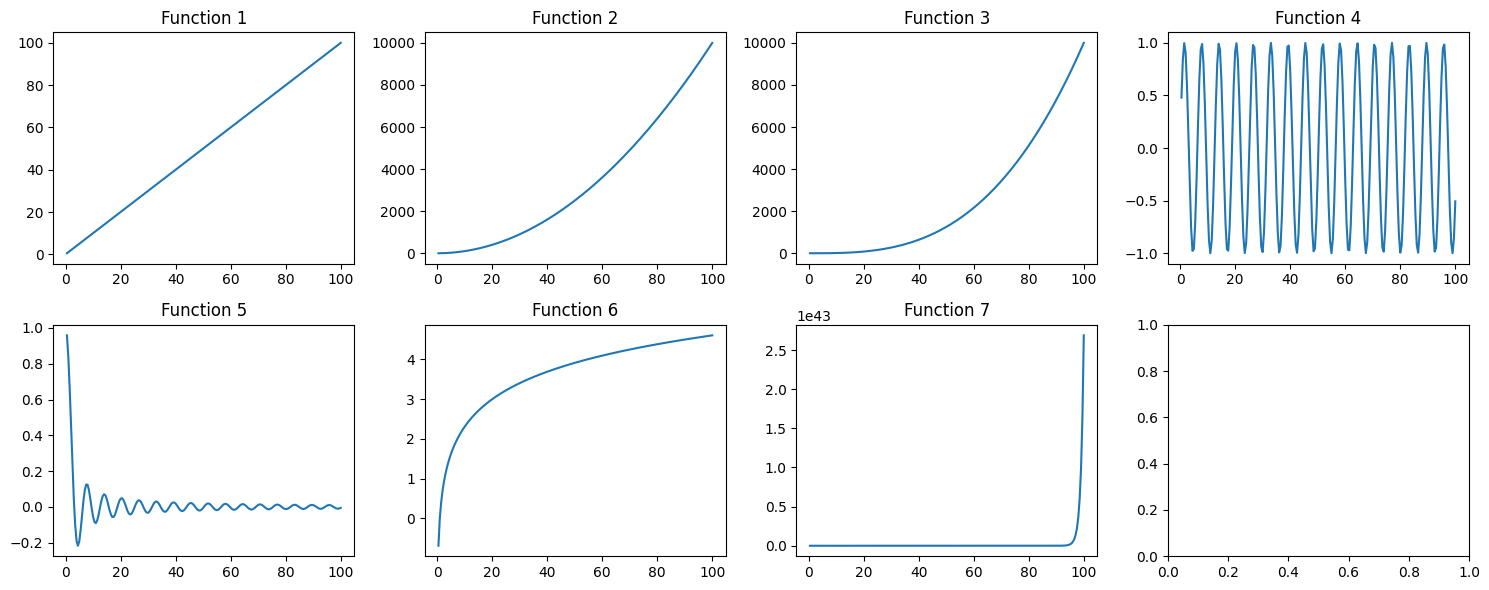

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x = np.arange(0.5, 100.1, 0.5)

# Define the functions based on the image
functions = [
    lambda x: x,
    lambda x: x**2,
    lambda x: x**3 / 100,
    lambda x: np.sin(x),
    lambda x: np.sin(x) / x,
    lambda x: np.log(x),
    lambda x: np.exp(x)
]

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

# Plot each function in a separate subplot
for i, func in enumerate(functions):
    row = i // 4
    col = i % 4
    axes[row, col].plot(x, func(x))
    axes[row, col].set_title(f"Function {i + 1}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#Question 10

In [26]:
import numpy as np
import pandas as pd

# Generating a matrix of size 20x5
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Column with the highest standard deviation
highest_std_col = df.std().idxmax()

# Row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with the highest standard deviation:", highest_std_col)
print("Row with the lowest mean:", lowest_mean_row)

Column with the highest standard deviation: d
Row with the lowest mean: 18


In [27]:
df

,a,b,c,d,e
0,1.609824,1.356205,1.113952,1.847208,1.688093
1,1.302242,1.412719,1.854943,1.292197,1.618044
2,1.874320,1.411974,1.147697,1.618395,1.779269
3,1.845981,1.959240,1.241913,1.604429,1.657266
4,1.028394,1.047786,1.192290,1.871829,1.948596
5,1.698050,1.341051,1.407845,1.001873,1.681173
6,1.394805,1.102592,1.452206,1.860527,1.106735
7,1.023124,1.363690,1.915187,1.043621,1.121658
8,1.504848,1.594278,1.760523,1.803954,1.183336
9,1.066970,1.916696,1.179598,1.749275,1.366321


#Question 11

In [30]:
# Add a new column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Creating the new column 'g'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Nmber of rows where the value in column 'g' is 'LT8'
num_lt8_rows = df[df['g'] == 'LT8'].shape[0]

# Standard deviation of column 'f' for rows where 'g' is 'LT8' and 'GT8' respectively
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print("DataFrame with new columns:")
print(df)
print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)


DataFrame with new columns:
           a         b         c         d         e         f    g
0   1.609824  1.356205  1.113952  1.847208  1.688093  7.615283  LT8
1   1.302242  1.412719  1.854943  1.292197  1.618044  7.480145  LT8
2   1.874320  1.411974  1.147697  1.618395  1.779269  7.831654  LT8
3   1.845981  1.959240  1.241913  1.604429  1.657266  8.308829  GT8
4   1.028394  1.047786  1.192290  1.871829  1.948596  7.088895  LT8
5   1.698050  1.341051  1.407845  1.001873  1.681173  7.129990  LT8
6   1.394805  1.102592  1.452206  1.860527  1.106735  6.916864  LT8
7   1.023124  1.363690  1.915187  1.043621  1.121658  6.467279  LT8
8   1.504848  1.594278  1.760523  1.803954  1.183336  7.846938  LT8
9   1.066970  1.916696  1.179598  1.749275  1.366321  7.278859  LT8
10  1.372849  1.989347  1.702387  1.456057  1.244875  7.765515  LT8
11  1.491442  1.653703  1.584363  1.205451  1.329586  7.264545  LT8
12  1.713709  1.882244  1.036187  1.117650  1.513277  7.263068  LT8
13  1.509228  1.3893

#Question 12

Broadcasting is used to manipulate the size of the array to perform a particluar operation (addition or substraction). In this example, the scalar value $5$ is added to the entire matrix $matrix$ using broadcasting. Broadcasting in NumPy allows arithmetic operations between arrays of different shapes by automatically aligning dimensions to perform the operation. In this case, the scalar $5$ is broadcasted to match the shape of the matrix, resulting in each element of the matrix being increased by $5$.


In [24]:
import numpy as np

# Define a 2x2 matrix
matrix = np.array([[1, 2],
                   [3, 4]])

# Add a scalar to the entire matrix using broadcasting
scalar_added = matrix + 5

print("Original Matrix:")
print(matrix)
print("\nScalar Added Matrix:")
print(scalar_added)


Original Matrix:
[[1 2]
 [3 4]]

Scalar Added Matrix:
[[6 7]
 [8 9]]


#Question 13

In [25]:
import numpy as np

def custom_argmin(arr):
    min_val = arr[0]
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i

    return min_index

# Example usage:
arr = np.array([5, 3, 9, 2, 7])
argmin_custom = custom_argmin(arr)
print("Custom argmin:", argmin_custom)

# Using np.argmin for verification
argmin_np = np.argmin(arr)
print("NumPy argmin:", argmin_np)



Custom argmin: 3
NumPy argmin: 3
